In [1]:
push!(LOAD_PATH, "..")

using ASE
using MatSciPy
using PyPlot
using PyCall
using TightBinding

import NRLTB

##Carbon

#### first homogeneous system

In [60]:
# create a n×n×n supercell for homogeneous Si lattice

n=3
at = bulk("C"; cubic=true)
at = repeat(at, (3, 3, 3))
X = positions(at)
set_pbc!(at, [true, true, true])
# plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))

216

In [61]:
reload("TightBinding")
reload("NRLTB")

tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)
set_pbc!(at, [true, true, true])
tbm.nkpoints = (2,2,2)

K, E = TightBinding.band_structure_all(at, tbm);

In [62]:
# take a very low temperature to approximate the fermi level at 0 temperature

tbm.fixed_eF = false
tbm.smearing.beta = 300
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

0.750234150411399

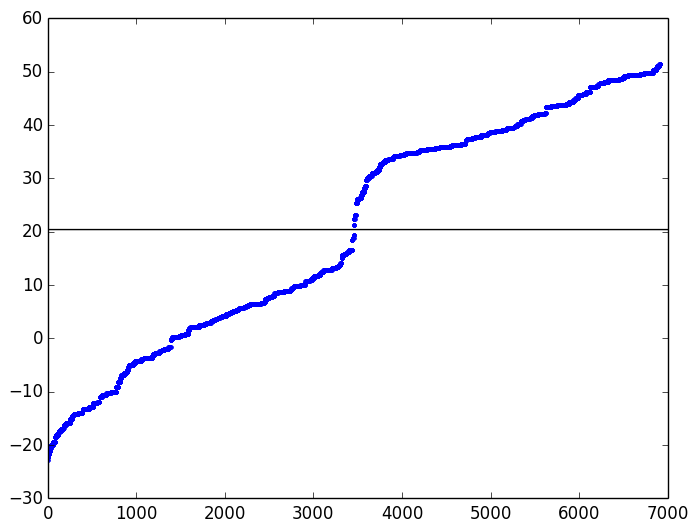

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x9337d10>

In [63]:
HAR = 27.211

F = E[:]
IsortF = sortperm(F[:])
plot(HAR * F[IsortF], ".")

x = 1:7000
y = x.^0 * tbm.eF * HAR
plot(x,y, "k-")

In [64]:
# plot band structure in the Brilioun zone
# use a signle cell

reload("TightBinding")
reload("NRLTB")

n=1
at = bulk("C"; cubic=true)
at = repeat(at, (n, n, n))
println("number of atoms = ", length(at))

set_pbc!(at, [true, true, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)
tbm.nkpoints = (16,16,16)

nb = 4
K, E = TightBinding.band_structure_near_eF(nb, at, tbm);

number of atoms = 8


In [65]:
tbm.fixed_eF = false
tbm.smearing.beta = 500
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

0.7571077050035883

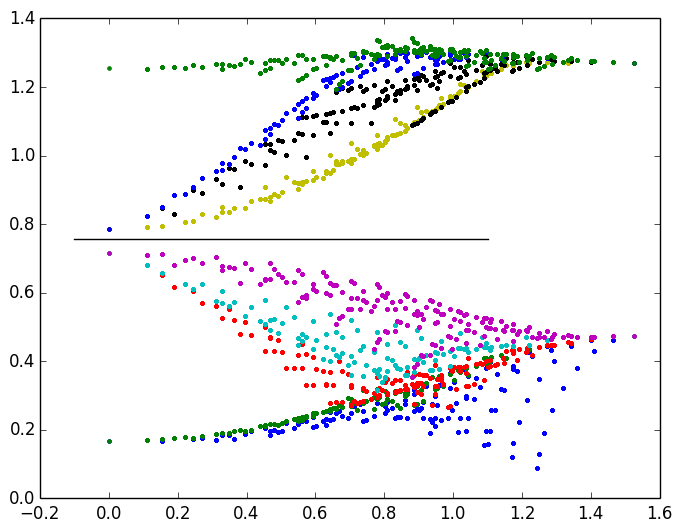

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17054510>

In [74]:
n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

for j = nb-3 : nb+5
    plot(kk, E[j,:][:], ".")
end
x = -0.1:0.01:1.1
y = x.^0 * tbm.eF
plot(x,y, "k-")

#### carbon with a vacancy

In [75]:
# create a vacancy by removing an atom at center

using PyCall
@pyimport ase

n=3
# n=3 means the defected system has 215 atoms, and should be named C215
at = bulk("C"; cubic=true)
at = repeat(at, (n, n, n))

X = positions(at)
na = length(at)
Y = zeros(3,na-1)
Y = X[:,1:na-1]

at_vac = ASEAtoms( ase.Atoms("C215") )
set_cell!(at_vac, cell(at))
set_positions!(at_vac, Y)
set_pbc!(at_vac, [true, true, true])

X_vac = positions(at_vac)
# plot3D(X_vac[1,:][:], X_vac[2,:][:], X_vac[3,:][:], "b.")
print(length(at_vac))

215

In [76]:
reload("TightBinding")
reload("NRLTB")

tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)
set_pbc!(at, [true, true, true])
tbm.nkpoints = (2,2,2)

K, G = TightBinding.band_structure_all(at_vac, tbm);

In [77]:
tbm.fixed_eF = false
tbm.smearing.beta = 300
TightBinding.update_eF!(at_vac, tbm)
EF = tbm.eF

0.6930681825514337

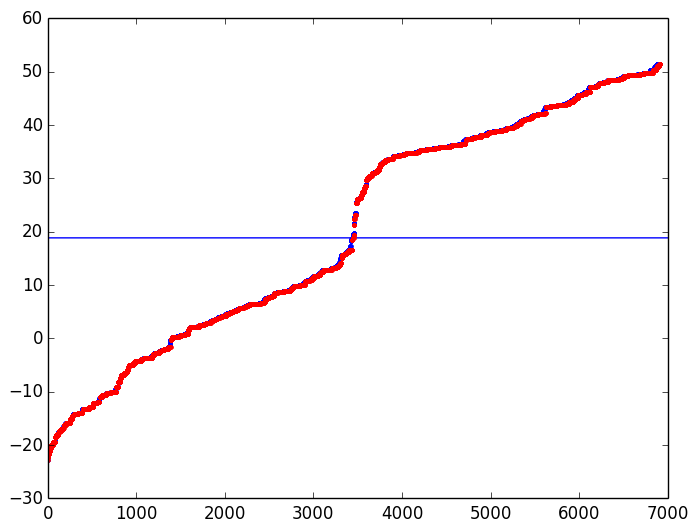

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xdaedb10>

In [80]:
# plot the eigenvalues
HAR = 27.211

H = G[:]
Isort = sortperm(H[:])
plot(HAR * H[Isort], ".", color="blue", linewidth=0.5)
hold

x = 1:7000
y = x.^0 * tbm.eF * HAR
plot(x,y)

# compare with the homogeneous system
plot(HAR * F[IsortF], ".", color="red", linewidth=0.5)

## Silicon 

#### first homogeneous system

In [2]:
# create a n×n×n supercell for homogeneous Si lattice

n=3
at = bulk("Si"; cubic=true)
at = repeat(at, (n, n, n))
set_pbc!(at, [true, true, true])
X = positions(at)
# plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))
cell(at)

216

3x3 Array{Float64,2}:
 16.29   0.0    0.0 
  0.0   16.29   0.0 
  0.0    0.0   16.29

In [8]:
reload("TightBinding")
reload("NRLTB")

tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)
set_pbc!(at, [true, true, true])
tbm.nkpoints = (2,2,2)

K, E = TightBinding.band_structure_all(at, tbm);

In [9]:
# take a very low temperature to approximate the fermi level at 0 temperature

tbm.fixed_eF = false
tbm.smearing.beta = 300
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

0.44800343057900505

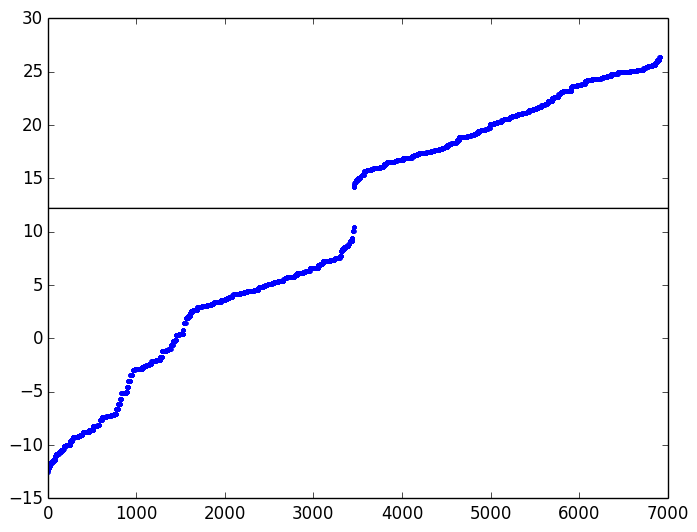

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xd160f50>

In [10]:
HAR = 27.211

F = E[:]
IsortF = sortperm(F[:])
plot(HAR * F[IsortF], ".")

x = 1:7000
y = x.^0 * tbm.eF * HAR
plot(x,y, "k-")

In [31]:
# plot band structure in the Brilioun zone
# use a signle cell

reload("TightBinding")
reload("NRLTB")

n=1
at = bulk("Si"; cubic=true)
at = repeat(at, (n, n, n))
println("number of atoms = ", length(at))

set_pbc!(at, [true, true, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)
tbm.nkpoints = (16,16,16)

nb = 4
K, E = TightBinding.band_structure_near_eF(nb, at, tbm);

number of atoms = 8


In [16]:
tbm.fixed_eF = false
tbm.smearing.beta = 500
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

0.4383723634469104

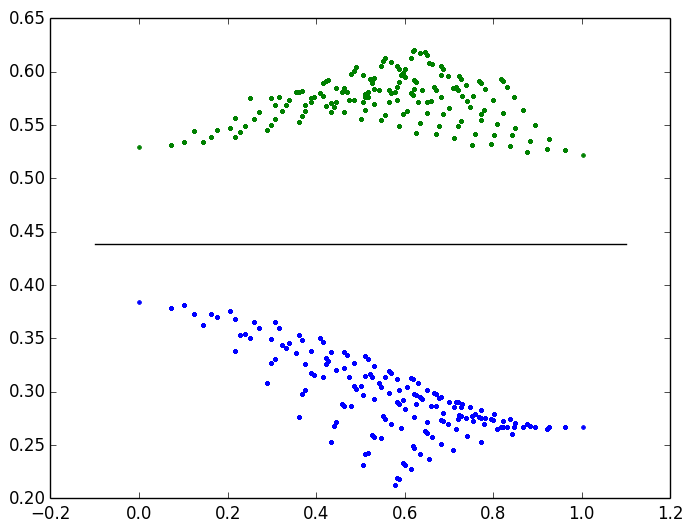

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xc4e3590>

In [34]:
n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

for j = nb+1 : nb+2
    plot(kk, E[j,:][:], ".")
end
x = -0.1:0.01:1.1
y = x.^0 * tbm.eF
plot(x,y, "k-")

#### Si lattice with a vacancy

In [37]:
# create a vacancy by removing an atom at center

using PyCall
@pyimport ase

n=3
# n=3 means the defected system has 215 atoms, and should be named Si215
at = bulk("Si"; cubic=true)
at = repeat(at, (n, n, n))

X = positions(at)
na = length(at)
Y = zeros(3,na-1)
Y = X[:,1:na-1]

at_vac = ASEAtoms( ase.Atoms("Si215") )
set_cell!(at_vac, cell(at))
set_positions!(at_vac, Y)
set_pbc!(at_vac, [true, true, true])

X_vac = positions(at_vac)
# plot3D(X_vac[1,:][:], X_vac[2,:][:], X_vac[3,:][:], "b.")
print(length(at_vac))

215

In [38]:
reload("TightBinding")
reload("NRLTB")

tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)
set_pbc!(at, [true, true, true])
tbm.nkpoints = (2,2,2)

K, G = TightBinding.band_structure_all(at_vac, tbm);

In [47]:
tbm.fixed_eF = false
tbm.smearing.beta = 300
TightBinding.update_eF!(at_vac, tbm)
EF = tbm.eF

0.37197205014467283

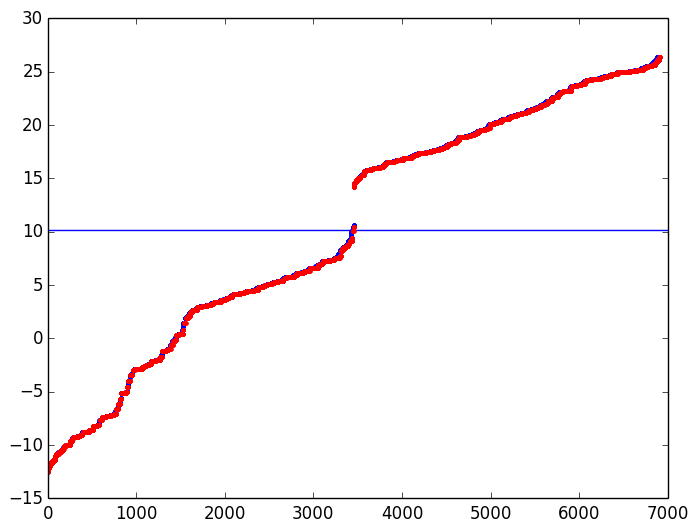

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x101d6790>

In [59]:
# plot the eigenvalues
HAR = 27.211

H = G[:]
Isort = sortperm(H[:])
plot(HAR * H[Isort], ".", color="blue", linewidth=0.5)
hold

x = 1:7000
y = x.^0 * tbm.eF * HAR
plot(x,y)

# compare with the homogeneous system
plot(HAR * F[IsortF], ".", color="red", linewidth=0.5)